In [1]:
#Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px 
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#importing datasets
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

#### Exploring train datasets 

In [4]:
train.shape

(1460, 81)

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.drop(columns="Id", inplace=True)

In [8]:
#check percentage of NAN 
round(((train.isnull().sum()) / (len(train)) *100),2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 80, dtype: float64

In [9]:
train.drop(columns="Fence", inplace=True)

In [10]:
#check percentage of NAN 
round(((train.LotFrontage.isnull().sum()) / (len(train.LotFrontage)) *100),2)

17.74

In [11]:
for col_name in train.columns:
    if train[col_name].dtype == "O":
        unique_category = train[col_name].nunique()
        print("Feature '{col_name}' has '{unique_category}' unique categories".format(col_name=col_name,unique_category=unique_category))
        if unique_category > 2:
            train.drop(columns=col_name, inplace=True)

Feature 'MSZoning' has '5' unique categories
Feature 'Street' has '2' unique categories
Feature 'Alley' has '2' unique categories
Feature 'LotShape' has '4' unique categories
Feature 'LandContour' has '4' unique categories
Feature 'Utilities' has '2' unique categories
Feature 'LotConfig' has '5' unique categories
Feature 'LandSlope' has '3' unique categories
Feature 'Neighborhood' has '25' unique categories
Feature 'Condition1' has '9' unique categories
Feature 'Condition2' has '8' unique categories
Feature 'BldgType' has '5' unique categories
Feature 'HouseStyle' has '8' unique categories
Feature 'RoofStyle' has '6' unique categories
Feature 'RoofMatl' has '8' unique categories
Feature 'Exterior1st' has '15' unique categories
Feature 'Exterior2nd' has '16' unique categories
Feature 'MasVnrType' has '3' unique categories
Feature 'ExterQual' has '4' unique categories
Feature 'ExterCond' has '5' unique categories
Feature 'Foundation' has '6' unique categories
Feature 'BsmtQual' has '4' u

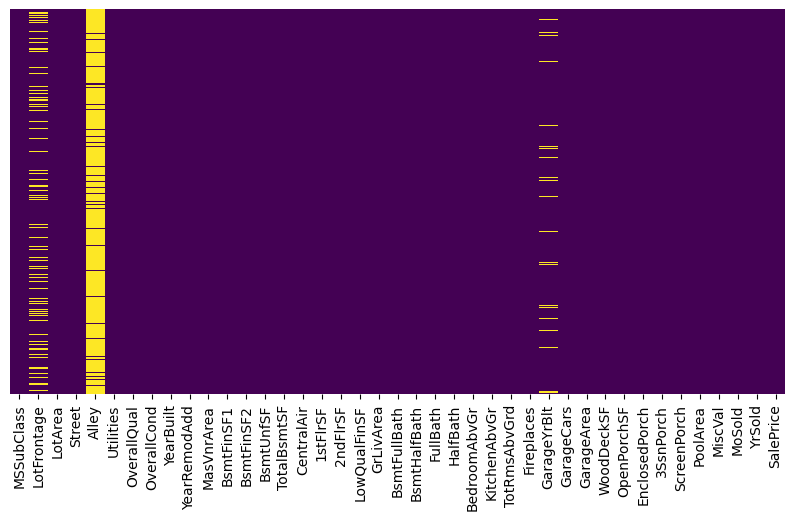

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis' );

In [13]:
for col_name in train.columns:
    if train[col_name].dtype == "O":
        unique_category = train[col_name].nunique()
        print("Feature '{col_name}' has '{unique_category}' unique categories".format(col_name=col_name,unique_category=unique_category))

Feature 'Street' has '2' unique categories
Feature 'Alley' has '2' unique categories
Feature 'Utilities' has '2' unique categories
Feature 'CentralAir' has '2' unique categories


In [14]:
#changing categorical data to INT
def obj (col):
   for col in train[col]:
       unique_category = train[col_name].unique()
       nuniq = unique_category[0]
       if col == nuniq:
           return 1
       else:
           return 2

In [15]:
# train["Street"].unique()
obj("Street")

2

In [16]:
train.Street.head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object